Universidad Tecnológica Nacional. Facultad Regional Mendoza

Teoría  de los Circuitos 1
## Trabajo Práctico número 1:


**INFORMACION ESCENCIAL  Y QUE SE DEBE TENER ABSULUTAMENTE CLARA:**

* Un nodo es la interconexión entre dos o mas elementos circuitales como lo son resistencias, capacitores, inductores, fuentes de tensión, fuentes de corriente.
* Si dos elementos comparten un **único** nodo y **de manera exclusiva** (únicamente esos dos elementos están conectados al nodo) se dice que lo elementos están en **SERIE**. 

En las siguientes dos figuras vemos tres resistencias en serie. Los nodos son las líneas (conductores idealmente con resistividad = 0) que conectan las resistencias. Desde el punto de vista del análsis de circuitos ambos son exáctamente iguales.



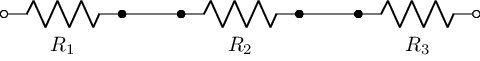

In [1]:
#
from lcapy import *
serie= R('R1') + R('R2')+ R('R3')
serie.draw( draw_nodes = 'all')

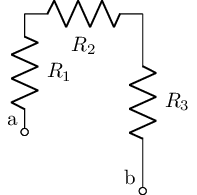

In [2]:
#C
from lcapy import Circuit
serie = Circuit()
serie.add("""
R1 a _1 ; up
R2 _1 _2 ; right
R3 _2 b ; down, size=1.5""")

serie.draw()

* **SOBRE ELEMENTOS EN SERIE CIRCULA LA MISMA INTENSIDAD DE CORRIENTE**. 

Esto se deduce de la Ley de las corrientes de Kirchhoff y significa que si en el circuito anterior circula $I_1$ por $R_1$, $I_2$ por $R_2$ y $I_3$ por $R_3$ entonces $I_1=I_2=I_3$

* Si dos o más elementos están conectados **entre los mismos dos nodos** se dice que están en **PARALELO**. 

Podemos ver en los siguientes circuitos tres resistencias en paralelo. Ambos circuitos son exáctamente iguales desde el punto de vista del análisis.

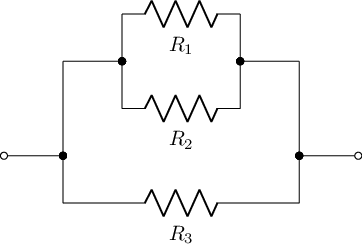

In [3]:
#
from lcapy import *
paralelo= (R('R1') | R('R2') | R('R3'))
paralelo.draw()

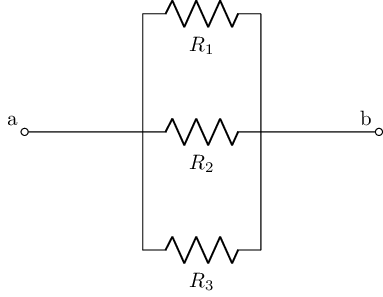

In [4]:
#
paralelo2=Circuit()

paralelo2.add('R1  _a1 _b1; right')
paralelo2.add('W1 _a1 _a2; down')
paralelo2.add('W2 _b1 _b2 ; down')
paralelo2.add('W3 _a2 a; left')
paralelo2.add('W4 _b2 b; right')
paralelo2.add('R2 _a2 _b2; right')
paralelo2.add('W5 _a2 _a3; down')
paralelo2.add('W6 _b2 _b3; down')
paralelo2.add('R3 _a3 _b3; right')

paralelo2.draw()


* **TODOS LOS ELEMENTOS EN PARALELO TIENEN EXACTAMENTE LA MISMA DIFERENCIA DE POTENCIAL ENTRE SUS TERMINALES**. 

Esto se deduce de la ley de las tensiones de Kirchhoff y significa que si entre los terminales de $R_1$ existe una diferencia de tensión $V_{R1}$, entre los terminales de $R_2$ existe $V_{R_2}$ y entre los terminales de $R_3$ existe $V_{R_3}$, entonces $V_{R_1}$=$V_{R_2}$ =$V_{R_3}$ 

In [5]:
#Clase teórica 
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/rSgafb-BqO4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


/home/javo/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# EJERCITACION: 

***

## Parte 1: ejercicios de circuitos serie y paralelo simples.

 **Ejercicio 1:**
Dado el circuito serie de la figura, encontrar el valor de la corriente $I$ y la caída de tensión en $R_2$. Demostrar que se cumple la Ley de Kirchhoff para las tensiones.

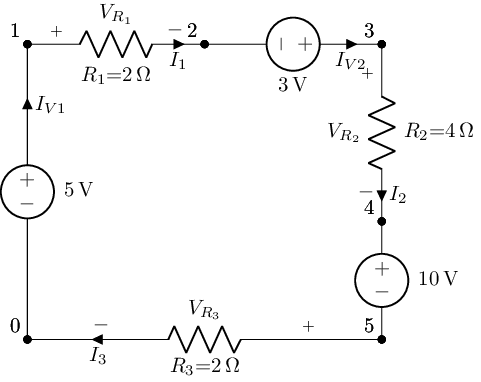

In [6]:
#codigo que genera esquematico utilizando la librería de python "lcapy"
#Ver tutorial de "primeros pasos con lcapy"

from lcapy import Circuit

cct = Circuit()
cct.add("""
V1 1 0 5; down, l={5\,V} , i=$I_{V1}$ 
R1 1 2 2; right, size=1.5, v=$V_{R_1}$, i=$I_1$
V2 3 2 3; left, size=1.5, l={3\,V}, i=$I_{V2}$
R2 3 4 4; down, size= 1.5, i=$I_2$, v=$V_{R_2}$
V3 4 5 10; down, size=1, l={10\,V}
R3 5 0 2; left, v=$V_{R_3}$, i=$I_3$""")

cct.draw()

El circuito de la figura podremos considerarlo resuelto cuando hemos encontrado la tensión y la corriente en cada elemento. En el circuito podemos identificar 9 incógnitas: $I_{R1}$, $I_{R2}$, $I_{R3}$, $I_{V1}$, $I_{V2}$, $I_{V3}$, $V_{R1}$, $V_{R2}$, $V_{R3}$, ya que la tensión en las fuentes es conocida.


**Dada Ley de Kirchhoff para la corriente: La suma algebraica de todas las corrientes en cualquier nodo de un circuito es igual a cero**, podemos deducir que la intensidad de corriente en todos los elementos tiene la misma magnitud y sentido ya que la corriente que sale de un elemento ingresa a un nodo y hacia el siguiente elemento.

Por ejemplo, como $I_{v1}$ ingresa al nodo **1** e $I_1$ sale del nodo **1** se deduce que $I_{v1}$+ $I_1$.

De manera general $I_{V1}=I_{R1}=I_{V2}=I_{R2}=I_{V3}=I_{R3}=I$

**Planteando Ley de mallas de Kirchhoff: La suma algebraica de todas las tensiones a los largo de cualquier camino cerrado en un circuito es igual a cero.**

$V_1-V_{R1}+V_2-V_{R2}-V_3-V_{R3}=0$

$V_1+V_2-V_3=V_{R1}+V_{R2}+V_{R3}$

$5V+3V-10V=-2=V_{R1}+V_{R2}+V_{R3}$

Y aplicando la Ley de Ohm:

$-2V=I\times R_1+I \times R_2+I \times R_3=I(R_1+R_2+R_3)=I(2\Omega+4\Omega+2\Omega)$

Por lo que $I=\frac{-2V}{8\Omega}=\frac{1}{4}A$


In [7]:
cct.R1.i

-1/4

Para calcular la tensiónen cada resistencia simplemente aplicamos la ley de Ohm.
$V_{R1}=I_1\times R=-\frac{1}{4}A\times 2\Omega=-\frac{1}{2}V$

In [8]:
cct.R1.v

-1/2

**Ejercicio 2**: El circuito serie de la siguiente figura es conocido como divisor de tensión ya que reparte la tensión de una fuente entre dos o más resistencias conectadas en serie.
Obtenga la expresión de la tensión en cada una de las resistencias del circuito.

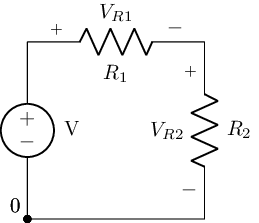

In [9]:
#Código diagrama ejercicio 2
from lcapy import Circuit
cct2 = Circuit()
cct2.add("""
V _1 0 dc; down, size= 1.5
R1 _1 _2 ; right, size= 1.5, v=$V_{R1}$ 
R2 _2 0_0 ; down, size= 1.5 , v=$V_{R2}$ 
W1 0_0 0 ;left""")

cct2.draw()

In [10]:
#
"""""Obtenemos el valor de la corriente del circuito, en este caso también se puede obtener como cct2.R1.i o cct2.R2.i
ya que al ser un circuito circula la misma corriente a través de todos los elementos"""

cct2.V.i

   V   
───────
R₁ + R₂

In [11]:
#Respuesta para R1
cct2.R1.v

  R₁⋅V 
───────
R₁ + R₂

In [12]:
#Respuesta para R1
cct2.R2.v

  R₂⋅V 
───────
R₁ + R₂

In [13]:
#
from lcapy import Circuit
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

from matplotlib.pyplot import figure, savefig
 
@interact(R2=(1,20,1))
def divisor(R2=10):
    cct2b = Circuit()
    cct2b.add('V _1 0 dc 10; down, size= 1.5')
    cct2b.add('R1 _1 _2 10; right, size= 1.5, v=$V_{R1}$')
    cct2b.add('R2 _2 0_0 {R2}; down, size= 1.5 , v=$V_{R2}$' .format(R2=R2))
    cct2b.add('W1 0_0 0 ;left') 
    
    vFuente=cct2b.V.v.evaluate()
    vR1=cct2b.R1.v.evaluate()
    vR2=cct2b.R2.v.evaluate()
    Itotal=cct2b.R2.i.evaluate()
    nombres=  ['$V$','$V_{R_2}$','$V_{R_1}$']
    datos=[vFuente,vR2,vR1]
    cantidadDeDatos=range(len(datos))
    cct2b.draw()
    fig = figure()
    #Note that we can add Greek symbols from LaTex into the figure text
    ax = fig.add_subplot(111, title='Resistor voltage (R2={}$\Omega$)'.format(R2))
    ax.bar(cantidadDeDatos, datos, width=0.8, align='center')
    ax.set_xticks(cantidadDeDatos)
    ax.set_xticklabels(nombres)

     
    

interactive(children=(IntSlider(value=10, description='R2', max=20, min=1), Output()), _dom_classes=('widget-i…

**Eejercicio 3:** Plantear la expresión de la diferencia de potencial en función de la corriente en cada una de las siguientes ramas del circuito. Suponer que los terminales superiores están conectados a un circuito que no graficado de manera que existen caminos para la corrientes definidas.

a)

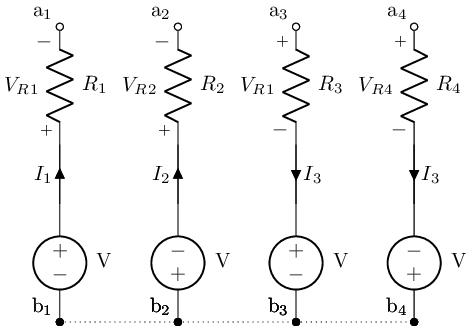

In [14]:
#
from lcapy import Circuit

cct3 = Circuit()
cct3.add('V1 _11a b_1 ; down, l={V} ')
cct3.add('Wv1 _11a _11b ; up, size=0.5, i=$I_1$ ')#cable vertical 1
cct3.add('R1 _11b a_1 ; up,, v=$V_R_1$' )  

cct3.add('Wo1 b_1 b_2 ; right, dotted')  

cct3.add('V2 b_2 _12a ; up, l={V} ')
cct3.add('Wv2 _12a _12b ; up, size=0.5, i=$I_2$ ')#cable vertical 2
cct3.add('R2 _12b a_2 ; up, v=$V_R_2$' )  

cct3.add('Wo2 b_2 b_3 ; right, dotted')

cct3.add('V3 _13a b_3  V; down, l={V} ')
cct3.add('Wv3 _13b _13a; down, size=0.5, i=$I_3$ ')#cable vertical 3
cct3.add('R3 a_3 _13b; down, v=$V_R_1$' )  

cct3.add('Wo3 b_3 b_4 ; right, dotted')

cct3.add('V4 b_4 _14a V; up, l={V} ')
cct3.add('Wv4 _14b _14a; down, size=0.5, i=$I_3$ ')#cable vertical 4
cct3.add('R4 a_4 _14b ; down, v=$V_R_4$' )  

cct3.draw()


Por ejemplo: $V_{a1-b1}=V-V_{R_1}=V-I_1 \times R_1$

b)

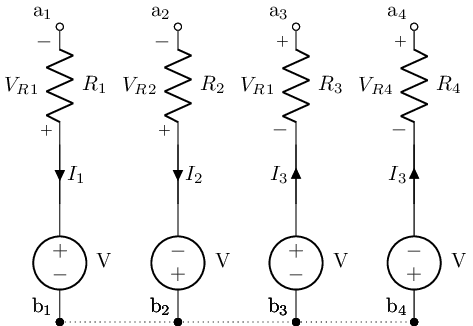

In [15]:
#
from lcapy import Circuit

cct3b = Circuit()
cct3b.add('V1 _11a b_1 ; down, l={V} ')
cct3b.add('Wv1 _11b _11a ; down, size=0.5, i=$I_1$ ')#cable vertical 1
cct3b.add('R1 _11b a_1 ; up,, v=$V_R_1$' )  

cct3b.add('Wo1 b_1 b_2 ; right, dotted')  

cct3b.add('V2 b_2 _12a ; up, l={V} ')
cct3b.add('Wv2 _12b _12a ; down, size=0.5, i=$I_2$ ')#cable vertical 2
cct3b.add('R2 _12b a_2 ; up, v=$V_R_2$' )  

cct3b.add('Wo2 b_2 b_3 ; right, dotted')

cct3b.add('V3 _13a b_3  V; down, l={V} ')
cct3b.add('Wv3 _13a _13b; up, size=0.5, i=$I_3$ ')#cable vertical 3
cct3b.add('R3 a_3 _13b; down, v=$V_R_1$' )  

cct3b.add('Wo3 b_3 b_4 ; right, dotted')

cct3b.add('V4 b_4 _14a V; up, l={V} ')
cct3b.add('Wv4 _14a _14b; up, size=0.5, i=$I_3$ ')#cable vertical 4
cct3b.add('R4 a_4 _14b ; down, v=$V_R_4$' )  

cct3b.draw()


Notar que en las resistencias el sentido de la corriente es contrario a la convención de signos, por ende cuando reemplazamos un término planteando la ley de ohm se deberá cambiar el signo.

Por ejemplo: $V_{a1-b1}=V-V_{R_1}=V-(-)I_1 \times R_1=V+I_1 \times R_1$

**Ejercicio 5:** Calcular el valor de las fuentes de tensión de los siguientes circuitos.

a)

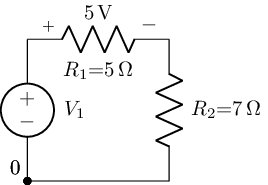

In [16]:
#Código diagrama ejercicio 5a 
from lcapy import Circuit

cct5a = Circuit()

cct5a.add('V1 _1 0 dc; down , size=1.2')
cct5a.add('R1 _1 _2 5; v={5\,V}, right, size=1.2 ')
cct5a.add('R2 _2 _00  7; down ')
cct5a.add('W _00 0  ; left ')

cct5a.draw()

b)

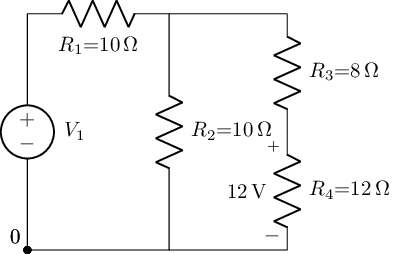

In [17]:
#Código diagrama ejercicio 5b
from lcapy import Circuit

cct5b = Circuit()

cct5b.add('V1 _1 0 ; down , size=1.2')
cct5b.add('R1 _1 _2 10; right, size=1.2 ')
cct5b.add('R2 _2 _0a  10; down')
cct5b.add('W1 _0a 0; left')
cct5b.add('W2 _2 _2b; right')
cct5b.add('R3 _2b _3 8; down')
cct5b.add('R4 _3 _0b 12; down, v={12\,V}')
cct5b.add('W4 _0b _0a; left ')

cct5b.draw()

**Ejercicio 6**: Dado el circuíto de la figura, calcular el valor de la tensión $V$ y el de la corriente que circula por $R_1$, $R_2$, $R_3$. Demostrar que se cumple la Ley de Kirchhoff para las corrientes.

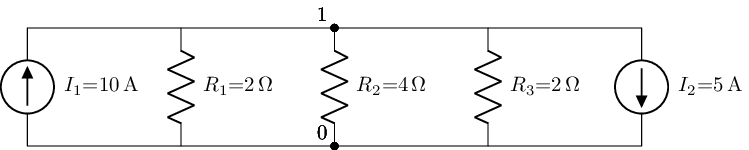

In [18]:
#Codigo diagrama ejercicio 6
cct6 = Circuit()
cct6.add("""
I1 _1_0 _0_0 10; down
W1 _1_0 _1_1; right, size=1.3
R1 _1_1 _0_1 2; down
W2 _0_1 _0_0; left, size=1.3
W3 _1_1 1; right, size=1.3
R2 1 0 4; down
W4 0 _0_1; left, size=1.3
W5 1 _1_3; rigth, size=1.3
R3 _1_3 _0_3 2; down
W6 _0_3 0; left, size=1.3
W7 _1_3 _1_4; right, size=1.3
I2 _0_4 _1_4 5; up
W8 _0_4 _0_3; left, size=1.3""")

cct6.draw()

El circuito solo posee dos nodos por lo que puede ser redibujado de la siguiente manera:

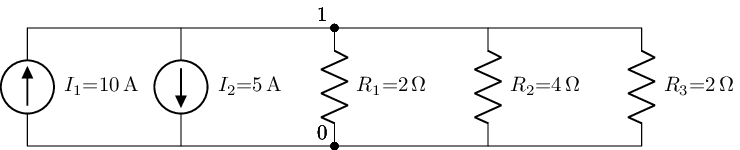

In [19]:
#Codigo diagrama equivalente ejercicio 6
cct6b = Circuit()
cct6b.add("""
I1 _1_0 _0_0 10; down
W1 _1_0 _1_1; right, size=1.3
I2 _0_1 _1_1 5; up
W2 _0_1 _0_0; left, size=1.3
W3 _1_1 1; right, size=1.3
R1 1 0 2; down
W4 0 _0_1; left, size=1.3
W5 1 _1_3; rigth, size=1.3
R2 _1_3 _0_3 4; down
W6 _0_3 0; left, size=1.3
W7 _1_3 _1_4; right, size=1.3
R3 _1_4 _0_4 2; down
W8 _0_4 _0_3; left, size=1.3""")

cct6b.draw()

Note que todos los elementos siguen conectados entre los mismos nodos por lo los circuitos son equivalentes.
Vemos que al nodo **1** ingresa $I_1$ y egresa $I_2$, por lo que la corriente neta debido a las fuentes de corriente que ingresa al nodo es $I_1-I_2=5A$

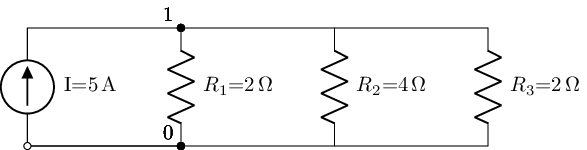

In [20]:
#Codigo diagrama ejercicio 3
cct6c = Circuit()
cct6c.add("""
I _1_0 _0_0 5; down
W1 _1_0 1; right, size=1.3
W2 0 _0_0; left, size=1.3
R1 1 0 2; down
W4 0 _0_1; left, size=1.3
W5 1 _1_3; rigth, size=1.3
R2 _1_3 _0_3 4; down
W6 _0_3 0; left, size=1.3
W7 _1_3 _1_4; right, size=1.3
R3 _1_4 _0_4 2; down
W8 _0_4 _0_3; left, size=1.3""")

cct6c.draw()

La resistencia equivalente entre los nodos **1** y **0** es $R_{eq}= \left( \frac{1}{R_1}+\frac{1}{R_2}+\frac{1}{R_3} \right) ^{-1}$

In [21]:
Req = 1/(1/cct6.R1.R+1/cct6.R2.R+1/cct6.R3.R)
Req

4/5

Redibujando el circuito queda:

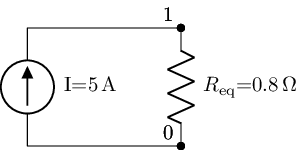

In [22]:
#Codigo diagrama ejercicio 6
cct6d = Circuit()
cct6d.add("""
I _1_0 _0_0 5; down
W1 _1_0 1; right, size=1.3
W2 0 _0_0; left, size=1.3
Req 1 0 0.8; down
""")

cct6d.draw()

La tensión entre el nodo **1** y **2** es $V=I \times R_{eq} = 5A \times 0.8 \omega = 4V$

In [23]:
cct6d.Req.v

4

Sabiendo la tensión entre los nodos podemos calcular la corriente en cada resistencia por Ley de Ohm.

$I_{R1} = \frac{V}{R_{1}}=\frac{4V}{2\Omega}=2A$,    
$I_{R2} = \frac{V}{R_{2}}=\frac{4V}{4\Omega}=1A$   
$I_{R3} = \frac{V}{R_{3}}=\frac{4V}{2\Omega}=2A$

Comprobamos que se cumple la ley de las corrientes de Kirchhoff en el nodo **1**:

$I_1-I_{R_1}-I_{R_2}-I_{R_3}-I_2=0$

$10A-2A-1A-2A-5A=0$

**Ejercicio 7:** El circuito paralelo de la siguiente figura es conocido como divisor de corriente ya que reparte la tensión de una fuente de corriente entre dos o más resistencias conectadas en paralelo. Obtenga la expresión de la corriente en cada una de las resistencias del circuito.

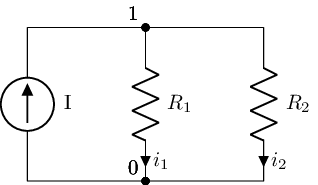

In [24]:
#
from lcapy import Circuit

divI=Circuit()
divI.add('I _1a _0a ; down')
divI.add('W1 _1a 1; right')
divI.add('W2 _0a 0; right')
divI.add('R1 1 0; down, i=$i_1$, size=1.3')
divI.add('W3 1 _1b; right')
divI.add('W4 0 _0b; right')
divI.add('R2 _1b _0b; down, i=$i_2$')

divI.draw()

In [25]:
divI.R1.i

R₂⋅i(t)
───────
R₁ + R₂

In [26]:
divI.R2.i

R₁⋅i(t)
───────
R₁ + R₂

**Ejercicio 8:** Investigue el principio de funcionamiento de un voltímetro y de un amperímetro. Describa cómo se deben conectar en un circuito y explique como es desaeble que sea la resistencia interna de  cada uno de estos instrumentos y por qué.

**Ejercicio 9:** En una toma de corriente de una instalación domiciliaria encontramos una tensión de $220 V$ eficaces. A estas tomas se conectan todos los elctrodomésticos y equipos electrónicos/electromecánicos que hay en un hogar. Si todos estos ertefactos son deben ser alimentados por esta misma tensión:

a)Deduzca cómo están interconectados a la red eléctrica (serio o paralelo) todos los artefactos de un hogar. 

b)Dibuje un diagrama básico de tres artefactos conectados en un hogar. (Representar el tomacorrientes como una fuente de tensión y los diferentes artefactos como resistencias)

**Ejercicio 10:** En el siguiente diagrama se presenta un circuito eléctrico que se utiliza para medir resistencias conocido como **puente de Wheatstone**. Invesitigue y describa su funcionamiento

Entre **a** y **b** se conecta un voltímetro. $R_{1}$ y $R_{3}$ son resistencias conocidas y $R_{2}$ una resistencia variable. $R_{x}$ es la resistencia a medir.

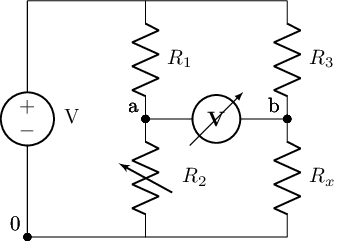

In [27]:
#Código diagrama ejercicio 10
from lcapy import Circuit

cct10 = Circuit()

cct10.add('V _1 0 ; down , size=1.2')

cct10.add('W1 _1 _1b; right')
cct10.add('W2 _1b _1c; right')
cct10.add('W3 0 _0b; right')
cct10.add('W4 _0b _0c; right')

cct10.add('R1 _1b a ; down')
cct10.add('R2 a _0b  ;variable, down')

cct10.add('R3 _1c b;  down')
cct10.add('Rx b _0c; down')

cct10.add('VM a b; l={$$}, size=1.2,right')

cct10.draw()

***
## Parte 2: Principios fundamentales.
Conceptos necesarios para resolver los ejercicios:
1. Teoremas de Thévenin y Norton
2. Teorema de la sustitución.
3. Principios de dualidad, linealidad y superposición.
4. Teorema de reducción de generadores de Millman.

In [28]:
#Clase teórica 
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/XtEmdVOGAl0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')



**Ejercicio 11:** Obtener el equivalente de Thévenin de los siguientes circuitos:

a)

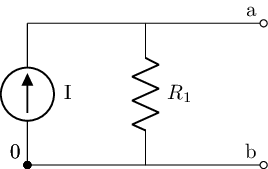

In [29]:
#
from lcapy import Circuit

cct11 = Circuit()

cct11.add('I _1 0 dc; down , size=1.2')

cct11.add('W1 _1 _1b; right')
cct11.add('W2 0 _0b; right')

cct11.add('R1 _1b _0b ; down')

cct11.add('W3 _1b a; right')
cct11.add('W4 _0b b; right')



cct11.draw()

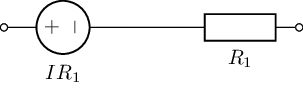

In [30]:
#podemos obtener la respuesta:
cct11.thevenin('a', 'b').draw()

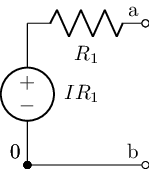

In [31]:
#Ese circuito es equivalente a esto:

from lcapy import Circuit

cct11r = Circuit()

cct11r.add('V _1 0 dc; down ,l={$IR_1$},size=1.2')

cct11r.add('R1 _1 a; right')
cct11r.add('W2 0  b; right')


cct11r.draw()

b)

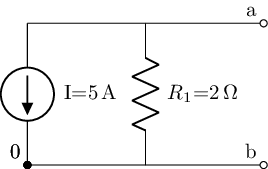

In [32]:
#
from lcapy import Circuit

cct11b = Circuit()

cct11b.add('I 0 _1  5; up , size=1.2')

cct11b.add('W1 _1 _1b; right')
cct11b.add('W2 0 _0b; right')

cct11b.add('R1 _1b _0b 2; down')

cct11b.add('W3 _1b a; right')
cct11b.add('W4 _0b b; right')



cct11b.draw()

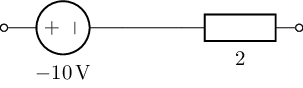

In [33]:
#podemos obtener las respuesta con:
cct11b.thevenin('a','b').draw()

#El nodo de la izquierda es a y el de la derecha es b

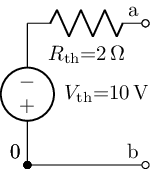

In [34]:
#Ese circuito es equivalente a esto:

from lcapy import Circuit

cct11br = Circuit()

cct11br.add('Vth 0 _1 dc 10; up, size=1.2')

cct11br.add('Rth _1 a 2; right')
cct11br.add('W2 0  b; right')


cct11br.draw()

c)

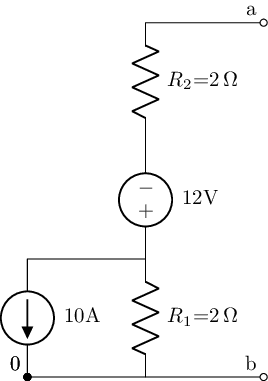

In [35]:
#
from lcapy import Circuit

cct11c = Circuit()

cct11c.add('I1 0 _x dc 10; up, , l={10A}')

cct11c.add('W1 0  _0b; right')
cct11c.add('W2 _0b b; right')
cct11c.add('W3 _x _xb; right')

cct11c.add('R1 _xb _0b 2; down')

cct11c.add('V1 _xb _y dc 12; up, l={12V}')

cct11c.add('R2 _y _z 2; up')

cct11c.add('W4 _z  a ; right')


cct11c.draw()

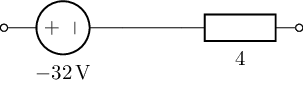

In [36]:
#podemos obtener las respuesta con:
cct11c.thevenin('a','b').draw()

**Ejercicio 12:** Obtener el equivalente de Norton de los siguientes circuitos:

a)

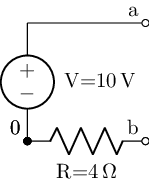

In [37]:
#
from lcapy import Circuit

cct12 = Circuit()

cct12.add('V _1 0 dc 10; down')

cct12.add('W _1 a ; right')
cct12.add('R 0  b 4; right')


cct12.draw()

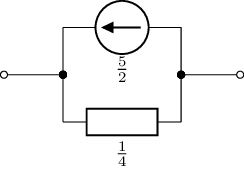

In [38]:
cct12.norton('a','b').draw()

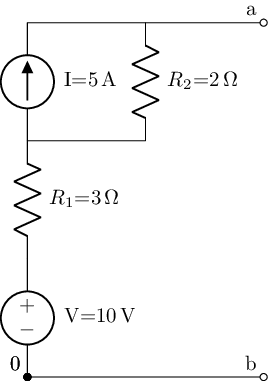

In [39]:
#
from lcapy import Circuit

cct12b = Circuit()

cct12b.add('V _1 0 dc 10; down')

cct12b.add('W1 0  b ; right,size = 2')

cct12b.add('R1 _1 _2 3 ; up ')

cct12b.add('I _3 _2 dc 5 ; down ')

cct12b.add('W2 _2  _2b ; right')
cct12b.add('W3 _3  _3b ; right')

cct12b.add('R2 _3b _2b 2 ; down')

cct12b.add('W4 _3b  a ; right')

cct12b.draw()

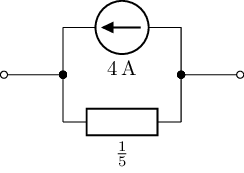

In [40]:
#Tener en cuenta que en vez de resistencia calcula el inverso, o sea la conductancia.
cct12b.norton('a','b').draw()

**Ejercicio 13:** Dado los siguientes circuitos, encontrar el equivalente de Norton y de Thévenin aplicando el principio de superposición.

a)

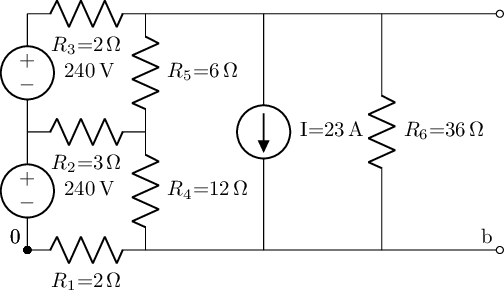

In [41]:
#
from lcapy import Circuit

ce13=Circuit()

ce13.add('V1 _c 0 dc 240; l={240\,V},down')
ce13.add('V2 _d _c dc 240; l={240\,V}, down')

ce13.add('R1 0 _b3 2; right') 
ce13.add('R2 _c _e 3 ; right') 
ce13.add('R3 _d _a3 2; right')

ce13.add('R4 _e _b3 12; down') 
ce13.add('R5 _a3 _e 6; down') 

ce13.add('W1 _b3 _b2 ; right') 
ce13.add('W2 _b2 _b1 ; right') 
ce13.add('W3 _b1 b ; right') 

ce13.add('W4 _a3 _a2 ; right') 
ce13.add('W5 _a2 _a1 ; right') 
ce13.add('W6 _a1 _a ; right') 

ce13.add('I _b2 _a2 dc 23; up')

ce13.add('R6 _a1 _b1 36; down') 

ce13.draw()

b)

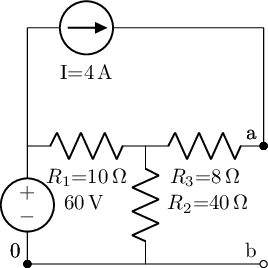

In [42]:
#from lcapy import Circuit
ce13b=Circuit()

ce13b.add('V _c 0 dc 60; down, l={60\,V}')

ce13b.add('W1 0 _b1; right') 
ce13b.add('W2 _b1 b; right') 

ce13b.add('W3 _c _c2; up')

ce13b.add('R1 _c _d 10; right')

ce13b.add('W4 a _a1 ; up')


ce13b.add('R2 _d _b1 40;down')
ce13b.add('R3 _d a 8; right')
ce13b.add('I  _ax _c2 dc 4; left')
ce13b.add('W5 _a1 _ax ; left')


ce13b.draw()

c)


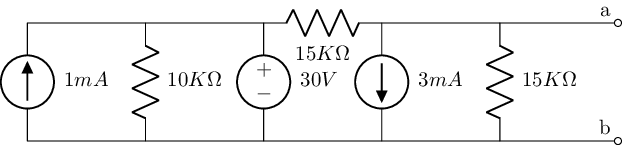

In [43]:
#from lcapy import Circuit
ce13c=Circuit()

ce13c.add('I _c2 _b5  dc 1e-3; l={$1mA$}, down')
ce13c.add('W1 _b5 _b4; right')
ce13c.add('W2 _b4 _b3; right')
ce13c.add('W3 _b3 _b2; right')
ce13c.add('W4 _b2 _b1; right')
ce13c.add('W5 _b1 b; right')

ce13c.add('W6 _c2 _c1; right')
ce13c.add('W7 _c1 _c; right')

ce13c.add('R1 _c _a2 15e3 ;l={$15K\Omega$},  right')

ce13c.add('W8 _a2 _a1; right')
ce13c.add('W9 _a1 a; right')

ce13c.add('R2 _c1 _b4 10e3 ;l={$10K\Omega$}, down')

ce13c.add('V _c _b3 dc 30 ;l={$30V$}, down')
ce13c.add('I _b2 _a2 dc 3e-3 ;l={$3mA$}, up')
ce13c.add('R3 _a1 _b1 15e3; l={$15K\Omega$}, down')


ce13c.draw()

**Ejercicio 14:** Encontrar el valor de $I_{0}$ aplicando transformación de fuentes.

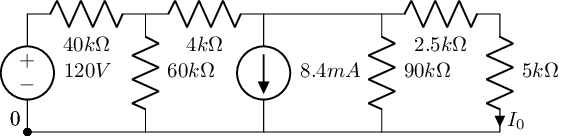

In [44]:
#
from lcapy import Circuit

ce14=Circuit()
ce14.add('W1 0 _0b; right')
ce14.add('W2 _0b _0c; right')
ce14.add('W3 _0c _0d; right')
ce14.add('W4 _0d _0e; right')

ce14.add('V1 _1 0 dc 120; down, l={$120V$}')

ce14.add('R1 _1 _2 40e3;right, l={$40k\Omega$}')
ce14.add('R2 _2 _0b 60e3;down, l={$60k\Omega$}')
ce14.add('R3 _2 _3 4e3;right, l={$4k\Omega$}')

ce14.add('I1 _0c _3 dc 8.4e-3; up, l={$8.4mA$}')
ce14.add('W5 _3 _3b; right')

ce14.add('R4 _3b _0d 90e3;down, l={$90k\Omega$}')
ce14.add('R5 _3b _4 2.5e3;right, l={$2.5k\Omega$}')
ce14.add('R6 _4 _0e 5e3;down, l={$5k\Omega$}, i={$I_0$}')


ce14.draw()

***
## Parte 3: Resolución sistemática de circuitos.

1. Método de análisis de las corrientes en las mallas (método de Maxwell).
2. Método de análisis de las tensiones nodales.

***

**Ejercicio 15: Corrientes de mallas** 

Utilizando el método de las corrientes de mallas obtener las incógnitas de los siguientes circuitos realizando el siguiente procedimiento:

a) Graficar el diagrama topológico del circuito.

b) Establecer el sentido de las corrientes de malla en una sola dirección para todas las mallas,
por ejemplo en sentido horario.

c) Escribir las ecuaciones de Kirchhoff de tensión para cada malla topológica, en función de
las corrientes de mallas planteadas.

d) Resuelva el sistema de ecuaciones resultantes para las corrientes de rama supuestas.  

e) Calcule el valor de la incógnita solicitada en el diagrama

15.1)

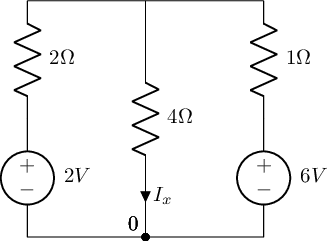

In [45]:
#
from lcapy import Circuit

ce151=Circuit()

ce151.add("""
V1 _a _0i dc 2; down, l={$2V$}
R1 _b _a 2; down, l={$2\Omega$}

W1 _0i 0; right
W2 _b _b1; right

R2 _b1 0 4; down, l={$4\Omega$}, i={$I_x$}

W3 0 _0d; right
W4 _b1 _b2; right

V2  _c _0d dc 6; down, l={$6V$}
R3 _b2 _c 1; down, l={$1\Omega$}

""")

ce151.draw()

15.2)


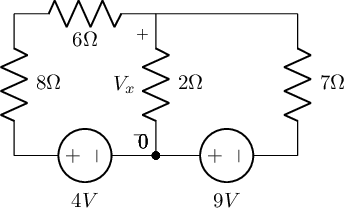

In [46]:
#
from lcapy import Circuit

ce152=Circuit()

ce152.add("""

V1  _a 0 dc 4; right, l={$4V$}, size=1.2
R1 _b _a 8; down, l={$8\Omega$}, size=1.2
R2 _c _b 6; left, l={$6\Omega$}
R3 _c 0 2; down, l={$2\Omega$}, v={$V_x$}
W1 _c _c2; right, size=1.2
R4 _c2 _d 7; down, l={$7\Omega$}, size=1.2
V2 0 _d dc 9; right, l={$9V$}

""")

ce152.draw()

15.3)

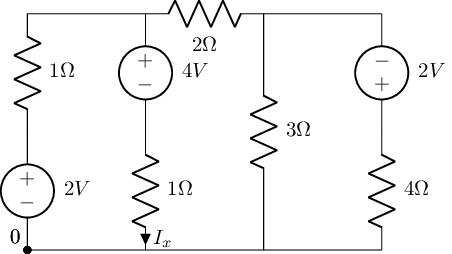

In [47]:
#
from lcapy import Circuit

ce153=Circuit()

ce153.add("""
V1 _a 0 dc 2; down, l={$2V$}
R1 _b _a 1; down, l={$1\Omega$}
W1 _b2 _b; left
V2 _b2 _c dc 4; down, l={$4V$}
R3 _c _0b 1; down, l={$1\Omega$}, i={$I_x$}
W2 _0b 0; left
R4 _b2 _d 2;rigth, l={$2\Omega$}
R5 _d _0c 3; down, l={$3\Omega$}
W3 _0c _0b; left
W4 _d _d2; right
V3 _e _d2 dc 2;up , l={$2V$}
R6 _e _0d 4; down, l={$4\Omega$}
W5 _0d _0c; left
""")

ce153.draw()

**Ejercicio 16: Corrientes de mallas con ramas virtuales**

Resuelva los circuitos de la siguiente figura aplicando el método de corrientes de malla:

16.1)

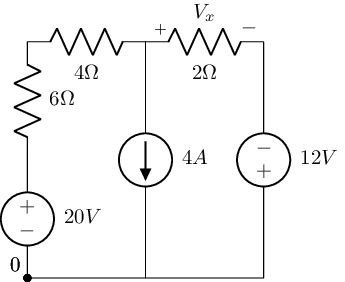

In [48]:
#
from lcapy import Circuit

ce161=Circuit()

ce161.add("""
V1 _a 0 dc 20; down, l={$20V$}
R1 _b _a 6;down, l={$6\Omega$}
R2 _b _c 4; right, l={$4\Omega$}
I1 _0b _c dc 4; up, l={$4A$}
W1 _0b 0; left 
R3 _c _d 2; right, l={$2\Omega$}, v={$V_x$}
V2 _0c _d dc 12; up, l={$12V$}
W2 _0c _0b; left
""")
ce161.draw()

16.2)

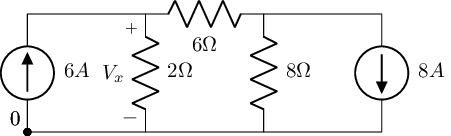

In [49]:
#
from lcapy import Circuit

ce162=Circuit()
ce162.add("""
I1 _a 0 dc 6; down, l={$6A$}
W1 _a _a2; right
R1 _a2 _0b 2;  down, l={$2\Omega$}, v={$V_x$}
W2 _0b 0; left
R2 _a2 _b 6; right, l={$6\Omega$}
R3 _b _0c 8; down, l={$8\Omega$}
W3 _0c _0b; left
W4 _b _b2; right
I2 _0d _b2 dc 8; up, l={$8A$}
W5 _0d _0c; left
""")

ce162.draw()

16.3)

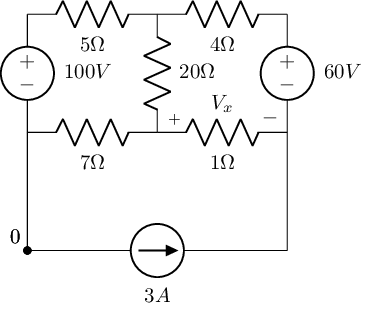

In [50]:
#
from lcapy import Circuit

ce163=Circuit()
ce163.add("""
W1 0 _0b; up
R1 _0b _a 7; right, l={$7\Omega$}, size=1.1
R2 _a _b 1; right, l={$1\Omega$}, v={$V_x$}, size=1.1
W2 _b _b2; down
I1 _b2 0 dc 3; left, l={$3A$}

V1 _c _0b dc 100; down, l={$100V$} 
R3 _c _d 5; right, l={$5\Omega$}
R4 _d _a 20; down , l={$20\Omega$}, vsize=1.1
R5 _d _e 4; right, l={$4\Omega$}
V2 _e _b dc 30;down, l={$60V$}
""")

ce163.draw()

**Ejercicio 17: Tensiones nodales** 

Utilizando el método de las tensiones nodales obtener las incógnitas de los siguientes circuitos realizando el siguiente procedimiento:

a) Realizar el diagrama topológico definiendo el sentido de las corrientes de cada rama.

b) Escribir las ecuaciones de corrientes de Kirchhoff en función de las tensiones nodales para cada nodo topológico excepto para el nodo de referencia.

c) Resolver el sistema de ecuaciones obtenido.

d) Calcule el valor de la incógnita solicitada en el diagrama

17.1)

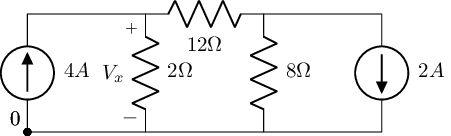

In [51]:
#
from lcapy import Circuit

ce171=Circuit()
ce171.add("""
I1 _a 0 dc 4; down, l={$4A$}
W1 _a _a2; right
R1 _a2 _0b 2;  down, l={$2\Omega$}, v={$V_x$}
W2 _0b 0; left
R2 _a2 _b 12; right, l={$12\Omega$}
R3 _b _0c 8; down, l={$8\Omega$}
W3 _0c _0b; left
W4 _b _b2; right
I2 _0d _b2 dc 2; up, l={$2A$}
W5 _0d _0c; left
""")

ce171.draw()

17.2)

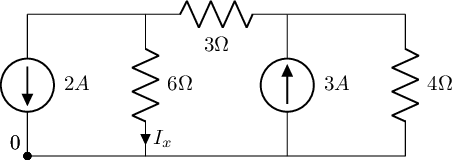

In [52]:
#
from lcapy import Circuit

ce172=Circuit()
ce172.add("""
I1 0 _a  dc 2; up, l={$2A$}
W1 _a _a2; right
R1 _a2 _0b 6;  down, l={$6\Omega$}, i={$I_x$}, size=1.2
W2 _0b 0; left
R2 _a2 _b 3; right, l={$3\Omega$}, size=1.2
I2 _b _0c dc 3; down, l={$3A$}
W3 _0c _0b; left
W4 _b _b2; right
R3 _b2 _0d  4; down, l={$4\Omega$}
W5 _0d _0c; left
""")

ce172.draw()

17.3)

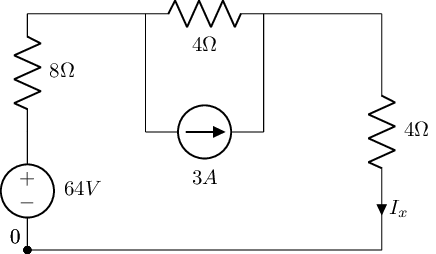

In [53]:
#
from lcapy import Circuit
ce173=Circuit()
ce173.add("""
V1 _a 0 dc 64; down, l={$64V$}
R1 _b _a 8; down, l={$8\Omega$}
W1 _b _b2;right
R2 _b2 _c 4;right, l={$4\Omega$}
W2 _c _c2 ; right
W3 _c _c3; down
I1 _c3 _b3 dc 3; left, l={$3A$}
W4 _b3 _b2; up
R3 _c2 _0b 4;down, l={$4\Omega$}, i={$I_x$}
W5 _0b 0; left
""")

ce173.draw()

**Ejercicio 18: Tensiones nodales con super-nodos** 

Resuelva los siguientes ejercicios aplicando el método de tensiones nodales.

1)

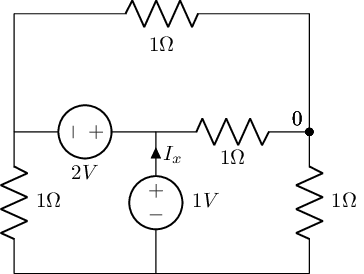

In [54]:
#
from lcapy import Circuit
ce181=Circuit()
ce181.add("""
R1 _b _a 1; down , l={$1\Omega$}
V1 _c _b dc 2; left, l={$2V$}, size=1.2
V2 _c _a2 dc 1;down, l={$1V$}, i={$I_x$}, size=1.2
W1 _a2 _a;left
W2 _b _b2; up
R2 _b2 _0b 1; right, l={$1\Omega$}
W3 _0b 0; down
R3 0 _c 1; left ,l={$1\Omega$}, size=1.3
R4 0 _a3 1;down, l={$1\Omega$}
W4 _a3 _a2;left
""")

ce181.draw()

18.2)

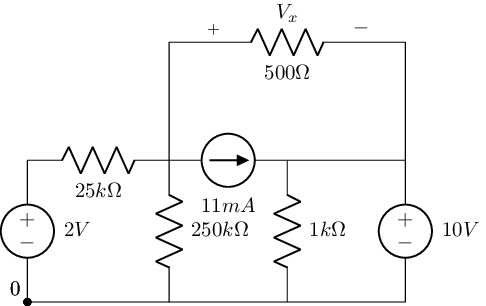

In [63]:
#
from lcapy import Circuit
ce182=Circuit()

ce182.add("""
V1 _a 0 dc 2; down , l={$2V$}
R1 _a _b 25e3; right, l={$25k\Omega$}, size=1.2
R2 _b _0b 250; down, l={$250k\Omega$}, size=1.2
W1 _0b 0; left
I1 _c _b dc 11e-3; left, l={$11mA$}
R3 _c _0c 1e3; down, l={$1k\Omega$}
W2 _0c _0b; left
W3 _b _b2; up
R4 _b2 _c2 500; right, l={$500\Omega$}, v={$V_x$}
W4 _c2 _c3; down
W5 _c3 _c; left
V2 _c3 _0d dc 10; down,l={$10V$}
W6 _0d _0c;left
""")

ce182.draw()

18.3)

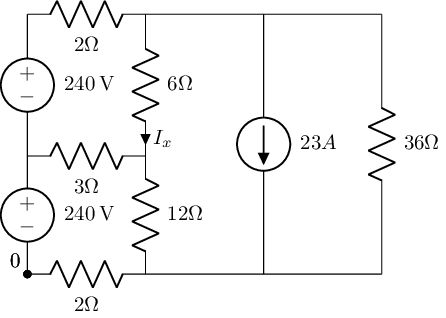

In [61]:
#
from lcapy import Circuit

ce183=Circuit()

ce183.add('V1 _c 0 dc 240; l={240\,V},down')
ce183.add('V2 _d _c dc 240; l={240\,V}, down')

ce183.add('R1 0 _b3 2; right,l={$2\Omega$}') 
ce183.add('R2 _c _e 3 ; right,l={$3\Omega$}') 
ce183.add('R3 _d _a3 2; right,l={$2\Omega$}')

ce183.add('R4 _e _b3 12; down,l={$12\Omega$}') 
ce183.add('R5 _a3 _e 6; down,l={$6\Omega$}, i={$I_x$}, size=1.2') 

ce183.add('W1 _b3 _b2 ; right') 
ce183.add('W2 _b2 _b1 ; right') 


ce183.add('W4 _a3 _a2 ; right') 
ce183.add('W5 _a2 _a1 ; right') 

ce183.add('I _b2 _a2 dc 23; up,l={$23A$}')

ce183.add('R6 _a1 _b1 36; down,l={$36\Omega$}') 

ce183.draw()

***
## Parte 4: Estudio de un amplificador clase A basado en un transistor BJT

Un amplificador es un circuito electrónico cuya función es incrementar la magnitud de una señal. Tiene un puerto de entrada donde se conecta la señal que se quiere amplificar y un puerto de salida donde se reproduce la misma señal con mayor amplitud.


El transistor es un dispositivo no lineal y su análisis queda queda fuera del estudio de esta materia en la que solo se estudian circuitos lineales. Sin embargo bajo determinadas condiciones el transistor BJT puede modelarse como un circuito linal obteniendo una buena aproximación. Es decir que podemos obtener un circuito equivalente del transistor que contiene solo elementos lineales.

Para que el transistor trabaje de manera aproximadamente linal se lo debe **polarizar**. Esto significa que se lo conecta a una red de resistencias y capacitores de manera que proporcionen las tensiones y corrientes adecuadas para que el transistor trabaje en de manera lineal.


En el siguiente circuito se presenta un amplificador a transistor de juntura bipolar (BJT por sus siglas en inglés) polarizado.


A partir de este circuito se puede obtener uno equivalente como el que se ve en la siguiente figura:


